# **Explaratory Data Analysis**

In [ ]:
#Importing a library
import pandas as pd

In [ ]:
#importing a dataset
df = pd.read_csv('bbc-news-data.csv', sep='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
df.describe() #describing a data

,category,filename,title,content
count,2225,2225,2225,2225
unique,5,511,2096,2092
top,sport,001.txt,Microsoft seeking spyware trojan,Microsoft has warned PC users to update their...
freq,511,5,2,2


In [ ]:
df.category.value_counts() #looking for value of category

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
# One-hot encoding

category = pd.get_dummies(df.category)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='filename')
df = df.drop(columns='category')
df

,title,content,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
...,...,...,...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,0,0,0,0,1
2222,Be careful how you code,A new European directive could put software w...,0,0,0,0,1
2223,US cyber security chief resigns,The man making sure US computer networks are ...,0,0,0,0,1


In [ ]:
# Importing library/package for NLP analysis
import nltk, os, re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

In [ ]:
#downloading a package 
nltk.download('wordnet')
nltk.download('stopwords') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# making a lower case for all text character.
df.title = df.title.apply(lambda x: x.lower())
df.content = df.content.apply(lambda x: x.lower())

# menghapus functuation/tanda baca pada teks
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df.title = df.title.apply(lambda x: cleaner(x))
    df.content = df.content.apply(lambda x: lem(x))

# melakukan lematization
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df.title = df.title.apply(lambda x: lem(x))
    df.content = df.content.apply(lambda x: lem(x))

# menghapus nomor pada teks
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    df['title'].apply(rem_numbers)
    df['content'].apply(rem_numbers)

# menghapus stopword seperti kata penghubung
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))
    df.title = df.title.apply(lambda x: stopword(x))
    df.content = df.content.apply(lambda x: lem(x))


# melihat data
df.head()

,title,content,business,entertainment,politics,sport,tech
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,1,0,0,0,0
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...,1,0,0,0,0
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,1,0,0,0,0
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...,1,0,0,0,0
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,1,0,0,0,0


# **Modelling & Evaluation**

In [ ]:
#Mengimpor library untuk membangun model
from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

In [ ]:
# Menentukan variabel independen/dependen atau membagi data menjadi feature dan label
text = df['title'].values + '' + df['content'].values
label = df[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [ ]:
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2,shuffle=True)

In [ ]:
#Melakukan tokenizer pada semua karakter dan memfilter kata non huruf atau menghapus semua tanda baca
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
 
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
# Membangun model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          320000    
                                                                 
 lstm_4 (LSTM)               (None, 128)               98816     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 435,973
Trainable params: 435,973
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [ ]:
history = model.fit(padded_train, label_train, epochs=50, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
56/56 - 13s - loss: 1.5991 - accuracy: 0.2596 - val_loss: 1.4971 - val_accuracy: 0.3933 - 13s/epoch - 225ms/step
Epoch 2/50
56/56 - 10s - loss: 1.4283 - accuracy: 0.4000 - val_loss: 1.1260 - val_accuracy: 0.5438 - 10s/epoch - 185ms/step
Epoch 3/50
56/56 - 10s - loss: 0.8782 - accuracy: 0.6685 - val_loss: 0.7726 - val_accuracy: 0.6854 - 10s/epoch - 185ms/step
Epoch 4/50
56/56 - 12s - loss: 0.3874 - accuracy: 0.8781 - val_loss: 0.6173 - val_accuracy: 0.7955 - 12s/epoch - 216ms/step
Epoch 5/50
56/56 - 11s - loss: 0.1406 - accuracy: 0.9607 - val_loss: 0.6261 - val_accuracy: 0.7820 - 11s/epoch - 188ms/step
Epoch 6/50
56/56 - 10s - loss: 0.0598 - accuracy: 0.9843 - val_loss: 0.6369 - val_accuracy: 0.8202 - 10s/epoch - 187ms/step
Epoch 7/50
56/56 - 11s - loss: 0.0196 - accuracy: 0.9949 - val_loss: 0.5332 - val_accuracy: 0.8697 - 11s/epoch - 190ms/step
Epoch 8/50
56/56 - 11s - loss: 0.0163 - accuracy: 0.9961 - val_loss: 0.5266 - val_accuracy: 0.8674 - 11s/epoch - 193ms/step
Epoch 9/

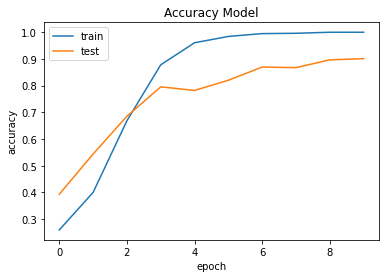

In [ ]:
# Accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

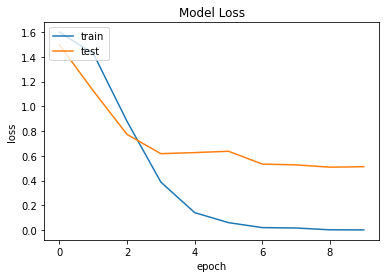

In [ ]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()